# First importing the neccessery Librarys and using a library named sqlite3 the code imports the table named wine_quality from WineQT .

In [1]:
import sqlite3
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler
db_path = r'C:\Users\LapTopCity\Desktop\becex\Hw2fixed_Mehrshad_ziari\WineQT.db'
with sqlite3.connect(db_path) as connection:
    try:
        df = pd.read_sql_query("SELECT * FROM wine_quality", connection)
        df['Id'] = range(1, len(df) + 1)
        df.to_sql('wine_quality', connection, if_exists='replace', index=False)
        print("Table 'wine_quality' updated successfully.")
    except Exception as e:
        print(f"An error occurred: {e}")


Table 'wine_quality' updated successfully.


# Then Checking if there is any Null Value inside the table and There is NO Null value 

In [2]:
null_count = df.isnull().sum()
print(null_count)
any_null = df.isnull().sum().any()
print(any_null)


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64
False


# In the next step The code checks if there is Any duplicated values in the table and the Answer is 0 Rows is dupplicated 

In [3]:

duplicates = df.duplicated()

num_duplicates = duplicates.sum()


print(f"Number of duplicate rows: {num_duplicates}")


Number of duplicate rows: 0


# Now we are using a box table for each colomn to see the Datas distribution . This table shows if there is any outliers in Each colomn 

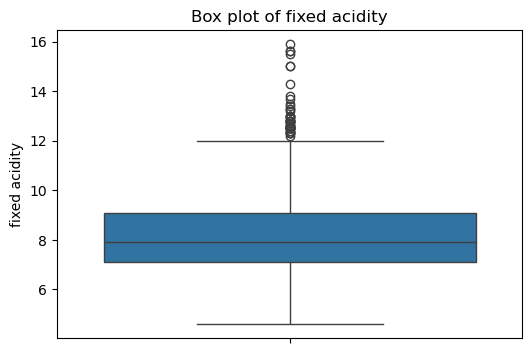

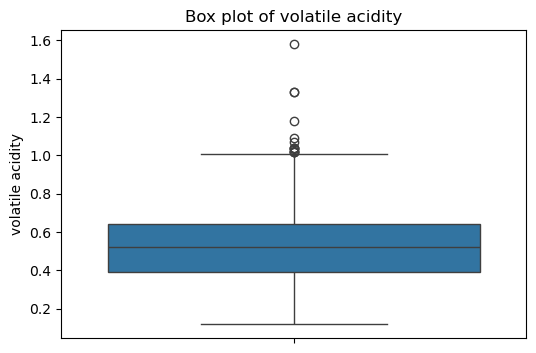

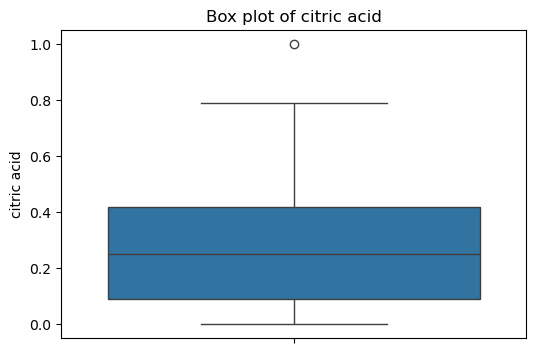

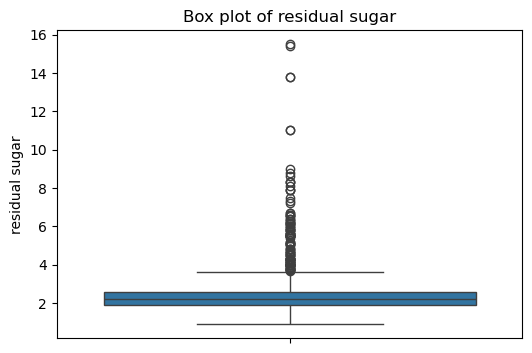

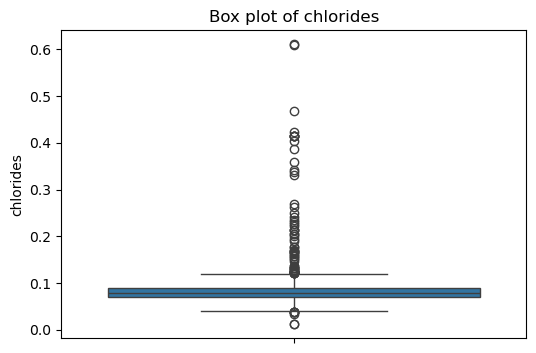

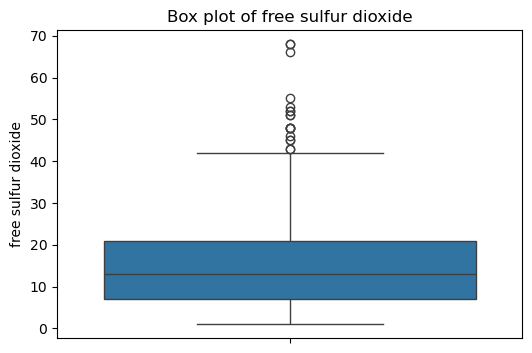

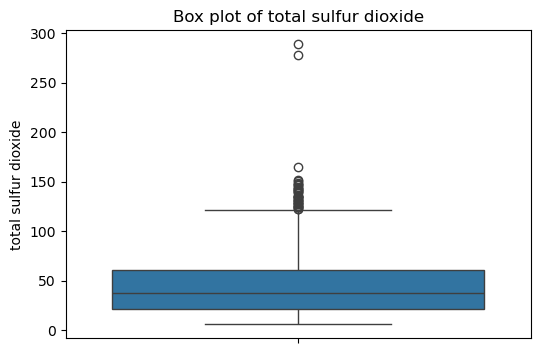

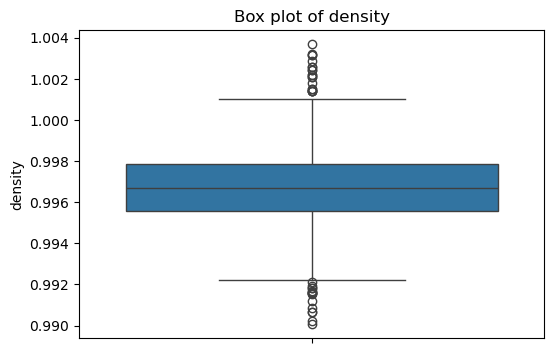

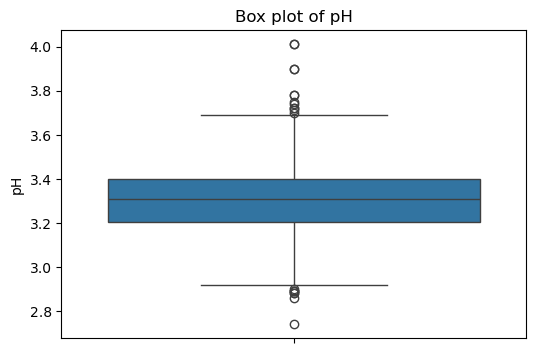

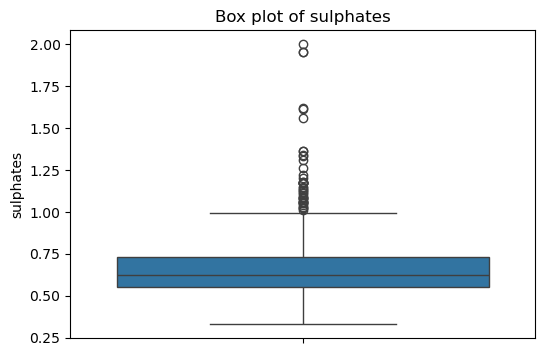

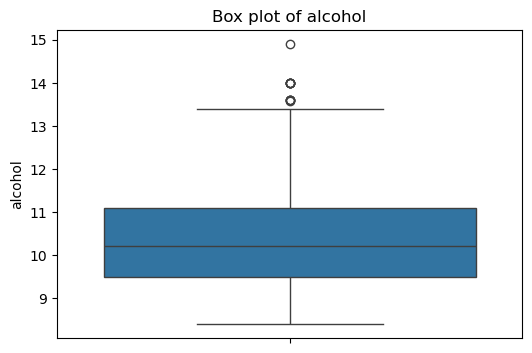

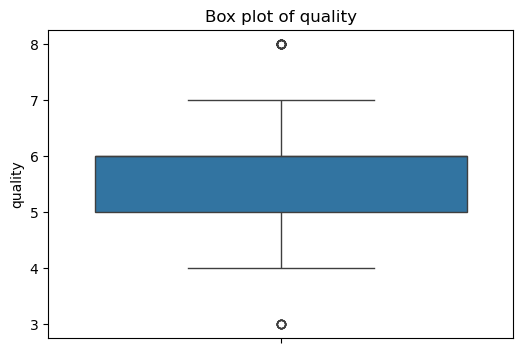

In [4]:
import matplotlib.pyplot as plt

columns_to_plot = df.columns[df.columns != 'Id']

for column in columns_to_plot:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[column])
    plt.title(f'Box plot of {column}')
    plt.show()


# The table of sulfur dioxide shows 2 big outliers and a big Data distribution in some of other colomns .

# After checking the datas in data base Using SQLIite This part of the code reducses the data types for each colomn that is using more memory that it needs . And after Running this section There is a huge diffrence in memory usage . 

In [5]:
df['fixed acidity'] = df['fixed acidity'].astype(np.float16)
df['volatile acidity'] = df['volatile acidity'].astype(np.float16)
df['citric acid'] = df['citric acid'].astype(np.float16)
df['residual sugar'] = df['residual sugar'].astype(np.float16)
df['pH'] = df['pH'].astype(np.float16)
df['sulphates'] = df['sulphates'].astype(np.float16)
df['alcohol'] = df['alcohol'].astype(np.float16)
df['quality'] = df['quality'].astype(np.int8)
df['free sulfur dioxide'] = df['free sulfur dioxide'].astype(np.int8)
df['density'] = df['density'].astype(np.float32)
df['Id'] = df['Id'].astype(np.int16)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float16
 1   volatile acidity      1143 non-null   float16
 2   citric acid           1143 non-null   float16
 3   residual sugar        1143 non-null   float16
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   int8   
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float32
 8   pH                    1143 non-null   float16
 9   sulphates             1143 non-null   float16
 10  alcohol               1143 non-null   float16
 11  quality               1143 non-null   int8   
 12  Id                    1143 non-null   int16  
dtypes: float16(7), float32(1), float64(2), int16(1), int8(2)
memory usage: 42.5 KB


# In this section of code you can see the colomns in table and range of them . also some statics that are neccessery for understanding the datas in the table . 

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.304688,0.531738,0.268311,2.531250,0.086933,15.614173,45.914698,0.996731,3.310547,0.657715,10.445312,5.657043,572.000000
std,1.748047,0.179565,0.196655,1.356445,0.047267,10.247585,32.782130,0.001925,0.156738,0.170410,1.082031,0.805824,330.099985
min,4.601562,0.119995,0.000000,0.899902,0.012000,1.000000,6.000000,0.990070,2.740234,0.330078,8.398438,3.000000,1.000000
25%,7.101562,0.392456,0.090027,1.900391,0.070000,7.000000,21.000000,0.995570,3.205078,0.549805,9.500000,5.000000,286.500000
50%,7.898438,0.520020,0.250000,2.199219,0.079000,13.000000,37.000000,0.996680,3.310547,0.620117,10.203125,6.000000,572.000000
75%,9.101562,0.640137,0.419922,2.599609,0.090000,21.000000,61.000000,0.997845,3.400391,0.729980,11.101562,6.000000,857.500000
max,15.898438,1.580078,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.011719,2.000000,14.898438,8.000000,1143.000000


# This table shows that the Data has a count of 1143 rows and it has big Standard deviation in some colomns like  total sulfur dioxide so now its neccessery in the next step this problem will be fixed . 


# In this section the code uses 4 diffrent ways of Normalization of data in table  using the  MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler methods and saves them into diffrent CSV files .

In [7]:
#MinMaxScaler
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
scaled_df.to_csv('minmaxed.csv', index=False)
#StandardScaler
standard_scaler = StandardScaler()
scaled_data_standard = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns)
scaled_data_standard.to_csv('standard.csv', index=False)
# Robust Scaling
robust_scaler = RobustScaler()
robust_data= pd.DataFrame(robust_scaler.fit_transform(df), columns=df.columns)
robust_data.to_csv('robust.csv', index=False)
# Max Absolute Scaling
max_abs_scaler = MaxAbsScaler()
scaled_data_max_abs =pd.DataFrame(max_abs_scaler.fit_transform(df), columns=df.columns)
scaled_data_max_abs.to_csv('maxabs.csv', index= False)



# Since the data had big outliers and big standard deviation the code has to continue with RobustScaler method that is a data preprocessing technique to robust  outliers .RobustScaler centers the data by subtracting the median from each feature.
# In the next Part Code splits the datas that has been processed by RobustScaler into two diffrent sections . First value is Quality that is the most important feature in table and finding the connections between Ths feature and the others is the key to this Dataset. 
# In next part Using The splited data codes splits them again into two diffrent parts that are test and train . code uses the normal size for test and train that is 70 % and 30 % . 70% Of data is used to develop a model for finding the best wine based on quality and 30 percent of the data
# is used to test the trained model . Code developes 3 diffrent ways of reggression methods and tests them with MSE and MAE to see wich one works better . MSE (Mean Squared Error) and MAE (Mean Absolute Error) . MSE measures the average squared difference between actual and predicted values. # It gives more weight to larger errors, making it sensitive to outliers and MAE measures the average absolute difference between actual and predicted values. It's more straightforward and less sensitive to outliers 

In [8]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd


df1 = pd.read_csv('robust.csv')
X = df1[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", 
         "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]]
y = df1["quality"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression 
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
print(f"Linear Regression MSE: {mse_linear:.4f}")
print(f"Linear Regression MAE: {mae_linear:.4f}")

# Lasso Regression
lasso_reg = Lasso(alpha=0.4)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
print(f"Lasso Regression MSE: {mse_lasso:.4f}")
print(f"Lasso Regression MAE: {mae_lasso:.4f}")

# Ridge Regression 
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
print(f"Ridge Regression MSE: {mse_ridge:.4f}")
print(f"Ridge Regression MAE: {mae_ridge:.4f}")


Linear Regression MSE: 0.3856
Linear Regression MAE: 0.4802
Lasso Regression MSE: 0.5820
Lasso Regression MAE: 0.6520
Ridge Regression MSE: 0.3856
Ridge Regression MAE: 0.4802


# Linear Regression and Ridge Regression are better than Lasso Regression for this  dataset based on both MSE and MAE values  . next step  is  developing  a more accurate Model using Feature exration . by Feature exration  i mean finding the most related colomns to quality that is the 
# goal of the code and make a new more simple table that helps the code to develop a more accurate model 

# First the code checks the relation between the each colomn . Using a Correlation Matrix table the bigger the data is in each cell more relation has been spoted 

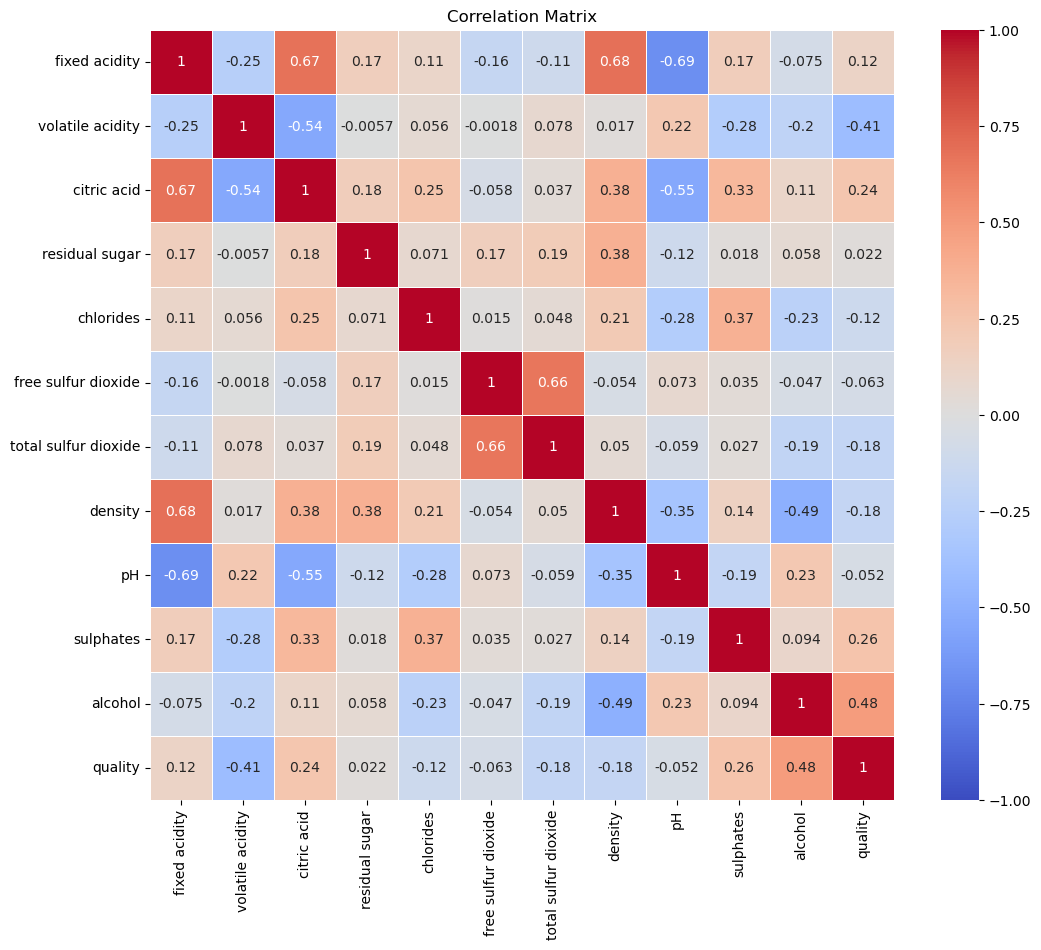

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
df_for_correlation = df.drop(columns=['Id']) if 'Id' in df.columns else df
correlation_matrix = df_for_correlation.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Since the code wants to develop a more accurate model it only going to use the strong corrleations becasue of that there is a  threshold = 0.4 that finds the strong Correlations between each colomns and saves them into a new csv file 


                      fixed acidity  volatile acidity  citric acid  \
fixed acidity                   NaN               NaN     0.673105   
volatile acidity                NaN               NaN    -0.544173   
citric acid                0.673105         -0.544173          NaN   
free sulfur dioxide             NaN               NaN          NaN   
total sulfur dioxide            NaN               NaN          NaN   
density                    0.681532               NaN          NaN   
pH                        -0.685079               NaN    -0.546252   
alcohol                         NaN               NaN          NaN   
quality                         NaN         -0.407383          NaN   

                      free sulfur dioxide  total sulfur dioxide   density  \
fixed acidity                         NaN                   NaN  0.681532   
volatile acidity                      NaN                   NaN       NaN   
citric acid                           NaN                   NaN     

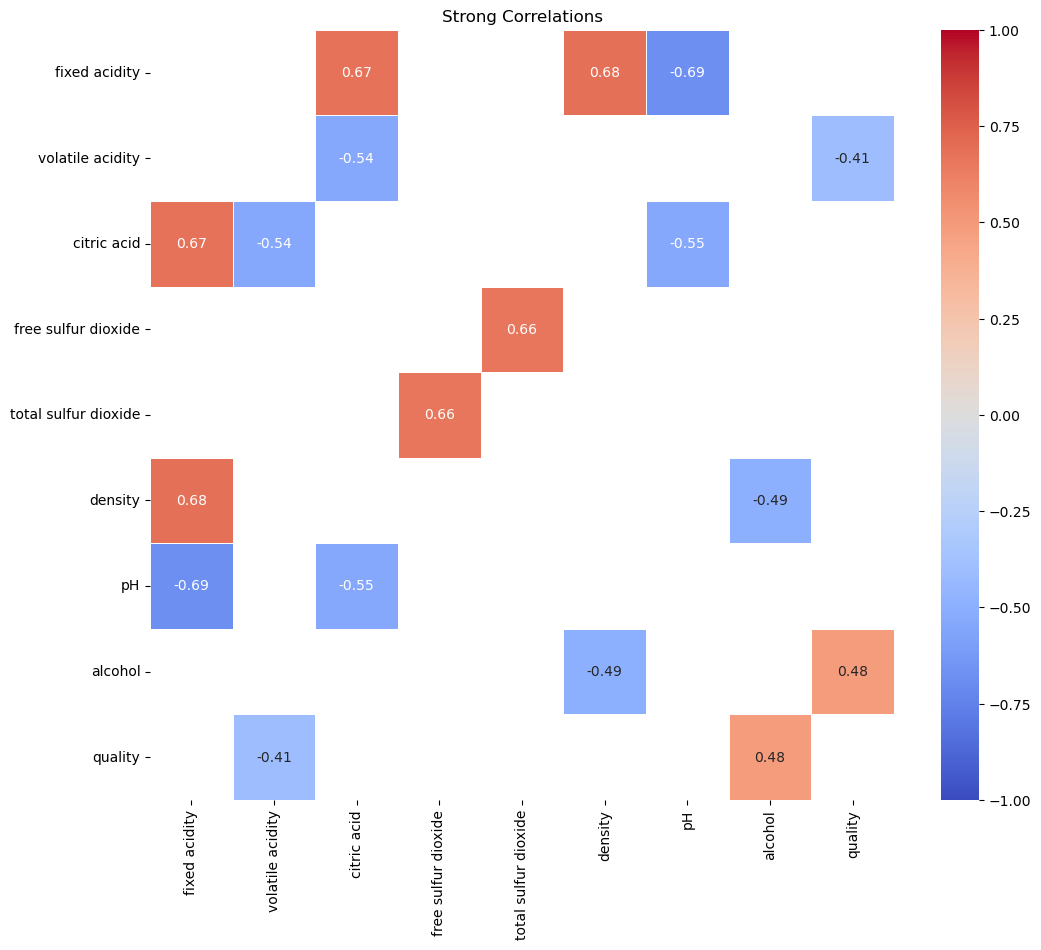

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
threshold = 0.4
strong_corrs = correlation_matrix[(abs(correlation_matrix) > threshold) & (abs(correlation_matrix) < 1.0)]
strong_corrs_clean = strong_corrs.dropna(axis=0, how='all').dropna(axis=1, how='all')
print(strong_corrs_clean)
strong_corrs_clean.to_csv('co_relations.csv')
plt.figure(figsize=(12, 10))
sns.heatmap(strong_corrs_clean, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Strong Correlations')
plt.show()


# Using the  data in co_relations.csv colomns that are more related to each other are going to be a new colomn to help develop a better and more accurate model 
# using diffrent ways of Regression that  is a type of supervised learning the code finds the best and most accurate model for this spesfic data 
# Mean Squared Error (MSE) and Mean Absolute Error (MAE) are used to show that if feature extraction helped the model or not .

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load and prepare the data
df = pd.read_csv('robust.csv')

# Create new feature columns
df['quality_volatile_acidity'] = df['quality'] + df['volatile acidity']
df['alcohol_density'] = df['alcohol'] + df['density']
df['pH_citric_acid'] = df['pH'] + df['citric acid']
df['pH_fixed_acidity'] = df['pH'] + df['fixed acidity']
df['density_fixed_acidity'] = df['density'] + df['fixed acidity']
df['total_sulfur_dioxide_free_sulfur_dioxide'] = df['total sulfur dioxide'] + df['free sulfur dioxide']
df['citric_acid_volatile_acidity'] = df['citric acid'] + df['volatile acidity']
df['fixed_acidity_citric_acid'] = df['fixed acidity'] + df['citric acid']

# Select features and target
feature_columns = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
    'quality_volatile_acidity', 'alcohol_density', 'pH_citric_acid', 'pH_fixed_acidity',
    'density_fixed_acidity', 'total_sulfur_dioxide_free_sulfur_dioxide',
    'citric_acid_volatile_acidity', 'fixed_acidity_citric_acid'
]

X = df[feature_columns]
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
print(f"Linear Regression MSE: {mse_linear:.4f}")
print(f"Linear Regression MAE: {mae_linear:.4f}")

# Lasso Regression
lasso_reg = Lasso(alpha=0.4)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
print(f"Lasso Regression MSE: {mse_lasso:.4f}")
print(f"Lasso Regression MAE: {mae_lasso:.4f}")

# Ridge Regression
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
print(f"Ridge Regression MSE: {mse_ridge:.4f}")
print(f"Ridge Regression MAE: {mae_ridge:.4f}")


Linear Regression MSE: 0.0000
Linear Regression MAE: 0.0000
Lasso Regression MSE: 0.5572
Lasso Regression MAE: 0.6368
Ridge Regression MSE: 0.0000
Ridge Regression MAE: 0.0009


# The results you’re seeing for Linear Regression and Ridge Regression showing MSE: 0.0000 and MAE: 0.0000 (or close to zero) suggest that the models are perfectly fitting the test data, which could be wrong so code gonna use the other scalers to check them too.

# Now code gonna repeat all of it with standard scaler 

In [12]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd


df1 = pd.read_csv('standard.csv')
X = df1[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", 
         "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]]
y = df1["quality"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression 
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
print(f"Linear Regression MSE: {mse_linear:.4f}")
print(f"Linear Regression MAE: {mae_linear:.4f}")

# Lasso Regression
lasso_reg = Lasso(alpha=0.4)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
print(f"Lasso Regression MSE: {mse_lasso:.4f}")
print(f"Lasso Regression MAE: {mae_lasso:.4f}")

# Ridge Regression 
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
print(f"Ridge Regression MSE: {mse_ridge:.4f}")
print(f"Ridge Regression MAE: {mae_ridge:.4f}")


Linear Regression MSE: 0.5944
Linear Regression MAE: 0.5962
Lasso Regression MSE: 0.8144
Lasso Regression MAE: 0.7697
Ridge Regression MSE: 0.5943
Ridge Regression MAE: 0.5962


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
threshold = 0.4
strong_corrs = correlation_matrix[(abs(correlation_matrix) > threshold) & (abs(correlation_matrix) < 1.0)]
strong_corrs_clean = strong_corrs.dropna(axis=0, how='all').dropna(axis=1, how='all')
print(strong_corrs_clean)
strong_corrs_clean.to_csv('co_relations2.csv')



                      fixed acidity  volatile acidity  citric acid  \
fixed acidity                   NaN               NaN     0.673105   
volatile acidity                NaN               NaN    -0.544173   
citric acid                0.673105         -0.544173          NaN   
free sulfur dioxide             NaN               NaN          NaN   
total sulfur dioxide            NaN               NaN          NaN   
density                    0.681532               NaN          NaN   
pH                        -0.685079               NaN    -0.546252   
alcohol                         NaN               NaN          NaN   
quality                         NaN         -0.407383          NaN   

                      free sulfur dioxide  total sulfur dioxide   density  \
fixed acidity                         NaN                   NaN  0.681532   
volatile acidity                      NaN                   NaN       NaN   
citric acid                           NaN                   NaN     

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load and prepare the data
df = pd.read_csv('standard.csv')



X = df[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", 
         "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]]
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
print(f"Linear Regression MSE: {mse_linear:.4f}")
print(f"Linear Regression MAE: {mae_linear:.4f}")

# Lasso Regression
lasso_reg = Lasso(alpha=0.4)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
print(f"Lasso Regression MSE: {mse_lasso:.4f}")
print(f"Lasso Regression MAE: {mae_lasso:.4f}")

# Ridge Regression
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
print(f"Ridge Regression MSE: {mse_ridge:.4f}")
print(f"Ridge Regression MAE: {mae_ridge:.4f}")


Linear Regression MSE: 0.5944
Linear Regression MAE: 0.5962
Lasso Regression MSE: 0.8144
Lasso Regression MAE: 0.7697
Ridge Regression MSE: 0.5943
Ridge Regression MAE: 0.5962


# This  shows that Linear Regression and Ridge Regression show almost identical performance and are superior to Lasso Regression based on both MSE and MAE.